In [3]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt
import cv2


## Training Process

In [4]:
class SRCNN(nn.Module): # neural network module 
    def __init__(self):
        super(SRCNN, self).__init__() # calls the constructor of the parent class (nn.Module) # it ensures that the nn.Module part of the SRCNN object is properly set up.
        self.conv1 = nn.Conv2d(3, 64, kernel_size=9, padding=4)
        self.conv2 = nn.Conv2d(64, 32, kernel_size=1, padding=0)
        self.conv3 = nn.Conv2d(32, 3, kernel_size=5, padding=2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.conv3(x)
        return x

model = SRCNN().to('cuda' if torch.cuda.is_available() else 'cpu')


In [5]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Resize((128, 128))
])


In [6]:
def calculate_metrics(output, target):
    output_np = output.permute(0, 2, 3, 1).cpu().numpy() #  Changes the order of dimensions of the tensor. If the original shape is (batch_size, channels, height, width), it changes it to (batch_size, height, width, channels).
    target_np = target.permute(0, 2, 3, 1).cpu().numpy()
    ssim_val = np.mean([ssim(o, t, data_range=t.max() - t.min(), channel_axis=-1, win_size=5) for o, t in zip(output_np, target_np)])
    psnr_val = np.mean([psnr(t, o, data_range=t.max() - t.min()) for o, t in zip(output_np, target_np)])
    mse_val = np.mean((output_np - target_np) ** 2)
    return ssim_val, psnr_val, mse_val


## Data-specific Class

In [ ]:

# Dataset_dir > images > train | test | val

class Training_Dataset(Dataset):
    def __init__(self, root_dir, split='train', transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.split = split
        self.image_files = [os.path.join(root_dir, 'images', split, f) for f in os.listdir(os.path.join(root_dir, 'images', split))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        image = Image.open(img_name)
        
        if self.transform:
            image = self.transform(image)

        return image


In [ ]:

root_dir = "CASIA Gait Dataset"
train_dataset = Training_Dataset(root_dir=root_dir, split='train', transform=transform)
val_dataset = Training_Dataset(root_dir=root_dir, split='val', transform=transform)
test_dataset = Training_Dataset(root_dir=root_dir, split='test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True) #  load data in batches 
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


NameError: name 'BSDS500Dataset' is not defined

Epoch [1/100], Step [10/59], Loss: 0.0152
Epoch [1/100], Step [20/59], Loss: 0.0148
Epoch [1/100], Step [30/59], Loss: 0.0097
Epoch [1/100], Step [40/59], Loss: 0.0082
Epoch [1/100], Step [50/59], Loss: 0.0072
Validation - Epoch [1/100], SSIM: 0.4125, PSNR: 21.8213, MSE: 0.0058
Epoch [2/100], Step [10/59], Loss: 0.0052
Epoch [2/100], Step [20/59], Loss: 0.0043
Epoch [2/100], Step [30/59], Loss: 0.0047
Epoch [2/100], Step [40/59], Loss: 0.0037
Epoch [2/100], Step [50/59], Loss: 0.0035
Validation - Epoch [2/100], SSIM: 0.5292, PSNR: 24.5770, MSE: 0.0031
Epoch [3/100], Step [10/59], Loss: 0.0028
Epoch [3/100], Step [20/59], Loss: 0.0027
Epoch [3/100], Step [30/59], Loss: 0.0026
Epoch [3/100], Step [40/59], Loss: 0.0024
Epoch [3/100], Step [50/59], Loss: 0.0022
Validation - Epoch [3/100], SSIM: 0.6109, PSNR: 26.0896, MSE: 0.0022
Epoch [4/100], Step [10/59], Loss: 0.0020
Epoch [4/100], Step [20/59], Loss: 0.0020
Epoch [4/100], Step [30/59], Loss: 0.0019
Epoch [4/100], Step [40/59], Loss: 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.018316755..0.927075].


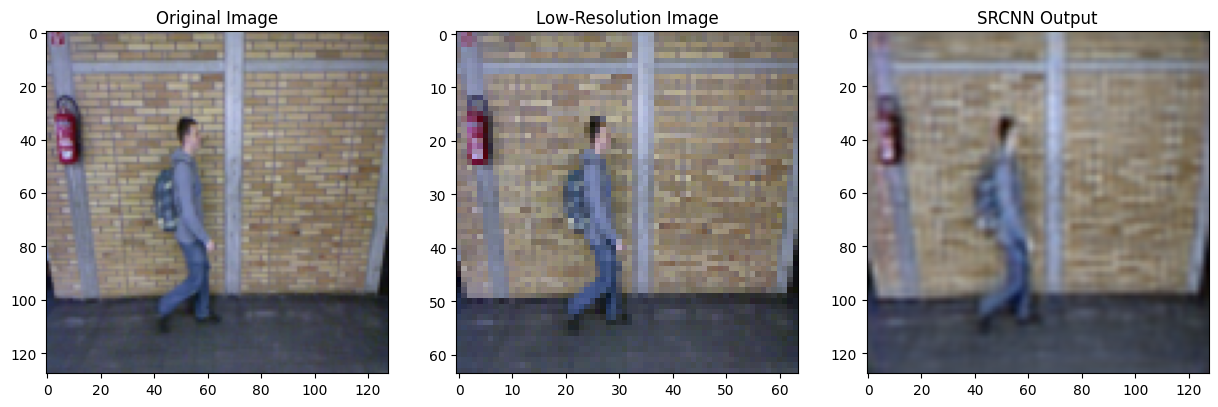

Epoch [11/100], Step [10/59], Loss: 0.0013
Epoch [11/100], Step [20/59], Loss: 0.0013
Epoch [11/100], Step [30/59], Loss: 0.0012
Epoch [11/100], Step [40/59], Loss: 0.0013
Epoch [11/100], Step [50/59], Loss: 0.0013
Validation - Epoch [11/100], SSIM: 0.7420, PSNR: 28.1891, MSE: 0.0013
Epoch [12/100], Step [10/59], Loss: 0.0013
Epoch [12/100], Step [20/59], Loss: 0.0014
Epoch [12/100], Step [30/59], Loss: 0.0013
Epoch [12/100], Step [40/59], Loss: 0.0013
Epoch [12/100], Step [50/59], Loss: 0.0012
Validation - Epoch [12/100], SSIM: 0.7494, PSNR: 28.6498, MSE: 0.0012
Epoch [13/100], Step [10/59], Loss: 0.0012
Epoch [13/100], Step [20/59], Loss: 0.0013
Epoch [13/100], Step [30/59], Loss: 0.0012
Epoch [13/100], Step [40/59], Loss: 0.0013
Epoch [13/100], Step [50/59], Loss: 0.0012
Validation - Epoch [13/100], SSIM: 0.7529, PSNR: 28.7113, MSE: 0.0012
Epoch [14/100], Step [10/59], Loss: 0.0012
Epoch [14/100], Step [20/59], Loss: 0.0012
Epoch [14/100], Step [30/59], Loss: 0.0012
Epoch [14/100], 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0071729096..0.91947585].


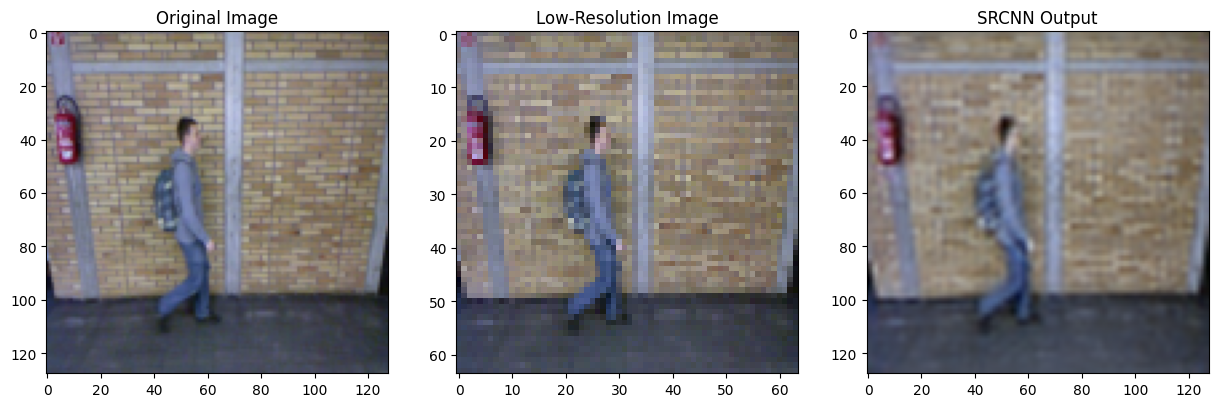

Epoch [21/100], Step [10/59], Loss: 0.0011
Epoch [21/100], Step [20/59], Loss: 0.0011
Epoch [21/100], Step [30/59], Loss: 0.0011
Epoch [21/100], Step [40/59], Loss: 0.0011
Epoch [21/100], Step [50/59], Loss: 0.0011
Validation - Epoch [21/100], SSIM: 0.7663, PSNR: 29.1257, MSE: 0.0011
Epoch [22/100], Step [10/59], Loss: 0.0010
Epoch [22/100], Step [20/59], Loss: 0.0011
Epoch [22/100], Step [30/59], Loss: 0.0011
Epoch [22/100], Step [40/59], Loss: 0.0010
Epoch [22/100], Step [50/59], Loss: 0.0011
Validation - Epoch [22/100], SSIM: 0.7667, PSNR: 27.7643, MSE: 0.0015
Epoch [23/100], Step [10/59], Loss: 0.0013
Epoch [23/100], Step [20/59], Loss: 0.0011
Epoch [23/100], Step [30/59], Loss: 0.0011
Epoch [23/100], Step [40/59], Loss: 0.0011
Epoch [23/100], Step [50/59], Loss: 0.0012
Validation - Epoch [23/100], SSIM: 0.7681, PSNR: 28.9249, MSE: 0.0011
Epoch [24/100], Step [10/59], Loss: 0.0011
Epoch [24/100], Step [20/59], Loss: 0.0010
Epoch [24/100], Step [30/59], Loss: 0.0011
Epoch [24/100], 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.017121337..0.9316585].


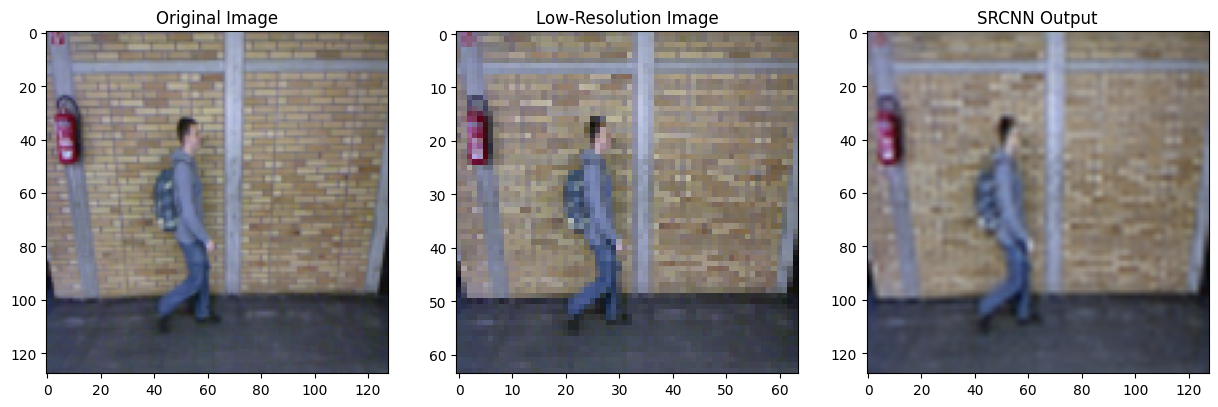

Epoch [31/100], Step [10/59], Loss: 0.0011
Epoch [31/100], Step [20/59], Loss: 0.0010
Epoch [31/100], Step [30/59], Loss: 0.0011
Epoch [31/100], Step [40/59], Loss: 0.0011
Epoch [31/100], Step [50/59], Loss: 0.0010
Validation - Epoch [31/100], SSIM: 0.7740, PSNR: 29.2317, MSE: 0.0011
Epoch [32/100], Step [10/59], Loss: 0.0011
Epoch [32/100], Step [20/59], Loss: 0.0010
Epoch [32/100], Step [30/59], Loss: 0.0010
Epoch [32/100], Step [40/59], Loss: 0.0010
Epoch [32/100], Step [50/59], Loss: 0.0011
Validation - Epoch [32/100], SSIM: 0.7720, PSNR: 29.1474, MSE: 0.0011
Epoch [33/100], Step [10/59], Loss: 0.0011
Epoch [33/100], Step [20/59], Loss: 0.0011
Epoch [33/100], Step [30/59], Loss: 0.0011
Epoch [33/100], Step [40/59], Loss: 0.0011
Epoch [33/100], Step [50/59], Loss: 0.0011
Validation - Epoch [33/100], SSIM: 0.7754, PSNR: 29.3495, MSE: 0.0010
Epoch [34/100], Step [10/59], Loss: 0.0011
Epoch [34/100], Step [20/59], Loss: 0.0010
Epoch [34/100], Step [30/59], Loss: 0.0011
Epoch [34/100], 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.010590556..0.93975663].


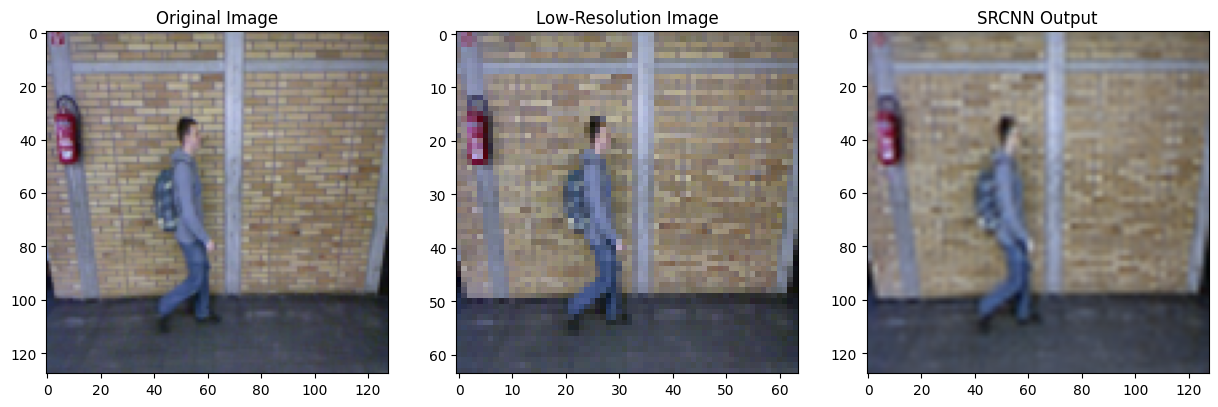

Epoch [41/100], Step [10/59], Loss: 0.0010
Epoch [41/100], Step [20/59], Loss: 0.0010
Epoch [41/100], Step [30/59], Loss: 0.0011
Epoch [41/100], Step [40/59], Loss: 0.0010
Epoch [41/100], Step [50/59], Loss: 0.0010
Validation - Epoch [41/100], SSIM: 0.7792, PSNR: 29.4484, MSE: 0.0010
Epoch [42/100], Step [10/59], Loss: 0.0010
Epoch [42/100], Step [20/59], Loss: 0.0010
Epoch [42/100], Step [30/59], Loss: 0.0012
Epoch [42/100], Step [40/59], Loss: 0.0011
Epoch [42/100], Step [50/59], Loss: 0.0010
Validation - Epoch [42/100], SSIM: 0.7796, PSNR: 29.4328, MSE: 0.0010
Epoch [43/100], Step [10/59], Loss: 0.0010
Epoch [43/100], Step [20/59], Loss: 0.0011
Epoch [43/100], Step [30/59], Loss: 0.0011
Epoch [43/100], Step [40/59], Loss: 0.0010
Epoch [43/100], Step [50/59], Loss: 0.0011
Validation - Epoch [43/100], SSIM: 0.7797, PSNR: 29.4289, MSE: 0.0010
Epoch [44/100], Step [10/59], Loss: 0.0011
Epoch [44/100], Step [20/59], Loss: 0.0011
Epoch [44/100], Step [30/59], Loss: 0.0010
Epoch [44/100], 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.009207811..0.95067453].


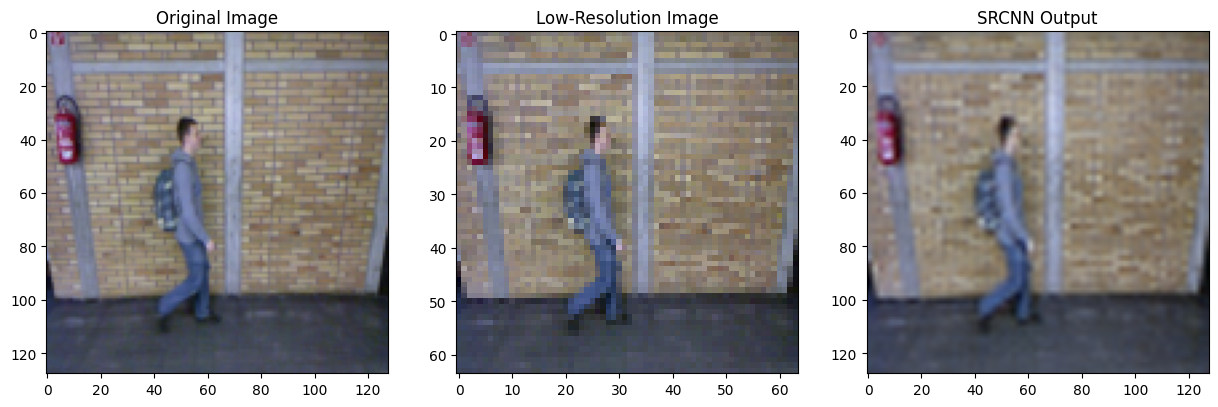

Epoch [51/100], Step [10/59], Loss: 0.0010
Epoch [51/100], Step [20/59], Loss: 0.0010
Epoch [51/100], Step [30/59], Loss: 0.0010
Epoch [51/100], Step [40/59], Loss: 0.0010
Epoch [51/100], Step [50/59], Loss: 0.0011
Validation - Epoch [51/100], SSIM: 0.7837, PSNR: 29.5429, MSE: 0.0010
Epoch [52/100], Step [10/59], Loss: 0.0010
Epoch [52/100], Step [20/59], Loss: 0.0011
Epoch [52/100], Step [30/59], Loss: 0.0011
Epoch [52/100], Step [40/59], Loss: 0.0010
Epoch [52/100], Step [50/59], Loss: 0.0010
Validation - Epoch [52/100], SSIM: 0.7829, PSNR: 29.5076, MSE: 0.0010
Epoch [53/100], Step [10/59], Loss: 0.0010
Epoch [53/100], Step [20/59], Loss: 0.0010
Epoch [53/100], Step [30/59], Loss: 0.0010
Epoch [53/100], Step [40/59], Loss: 0.0010
Epoch [53/100], Step [50/59], Loss: 0.0010
Validation - Epoch [53/100], SSIM: 0.7846, PSNR: 29.5395, MSE: 0.0010
Epoch [54/100], Step [10/59], Loss: 0.0010
Epoch [54/100], Step [20/59], Loss: 0.0015
Epoch [54/100], Step [30/59], Loss: 0.0012
Epoch [54/100], 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.015092348..0.9553727].


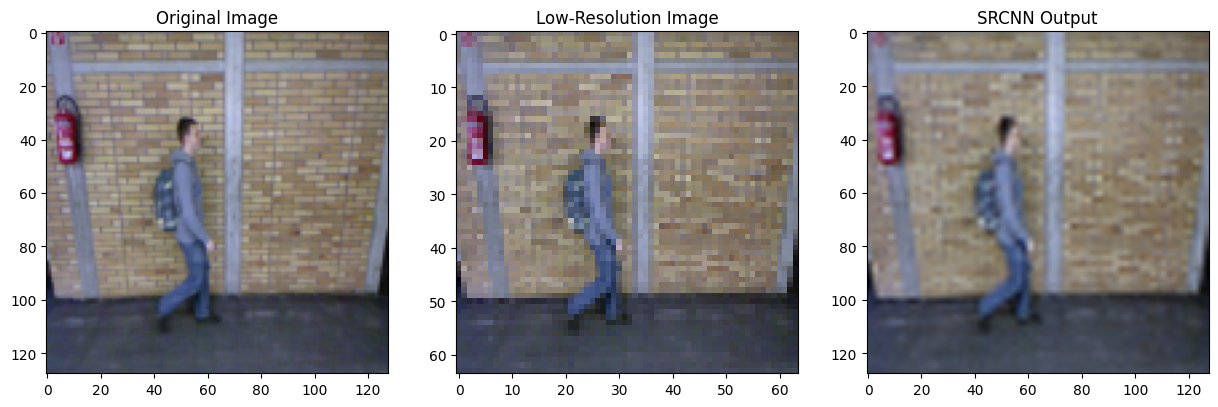

Epoch [61/100], Step [10/59], Loss: 0.0010
Epoch [61/100], Step [20/59], Loss: 0.0011
Epoch [61/100], Step [30/59], Loss: 0.0012
Epoch [61/100], Step [40/59], Loss: 0.0010
Epoch [61/100], Step [50/59], Loss: 0.0010
Validation - Epoch [61/100], SSIM: 0.7875, PSNR: 29.5880, MSE: 0.0010
Epoch [62/100], Step [10/59], Loss: 0.0010
Epoch [62/100], Step [20/59], Loss: 0.0010
Epoch [62/100], Step [30/59], Loss: 0.0010
Epoch [62/100], Step [40/59], Loss: 0.0009
Epoch [62/100], Step [50/59], Loss: 0.0009
Validation - Epoch [62/100], SSIM: 0.7880, PSNR: 29.6214, MSE: 0.0010
Epoch [63/100], Step [10/59], Loss: 0.0010
Epoch [63/100], Step [20/59], Loss: 0.0010
Epoch [63/100], Step [30/59], Loss: 0.0010
Epoch [63/100], Step [40/59], Loss: 0.0010
Epoch [63/100], Step [50/59], Loss: 0.0010
Validation - Epoch [63/100], SSIM: 0.7883, PSNR: 29.6372, MSE: 0.0010
Epoch [64/100], Step [10/59], Loss: 0.0010
Epoch [64/100], Step [20/59], Loss: 0.0010
Epoch [64/100], Step [30/59], Loss: 0.0010
Epoch [64/100], 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0113774855..0.9697426].


Validation - Epoch [70/100], SSIM: 0.7902, PSNR: 29.4780, MSE: 0.0010


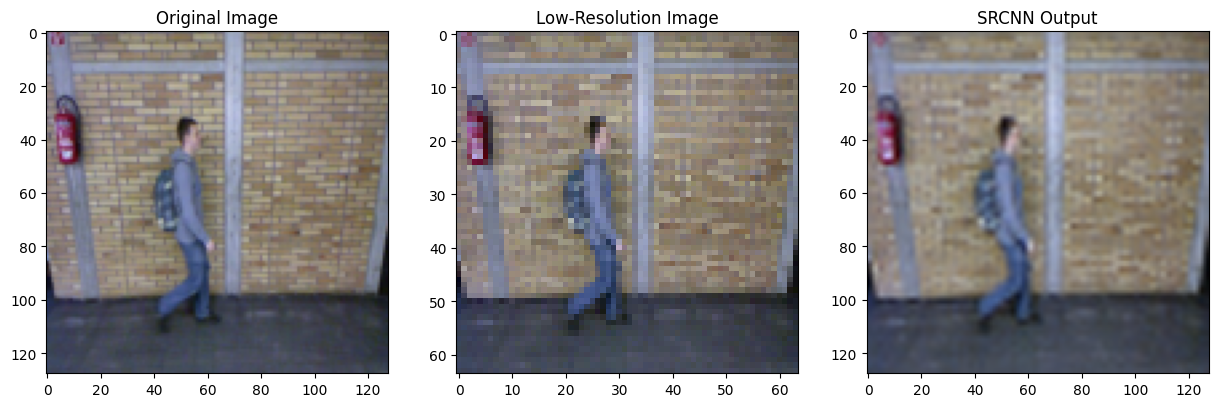

Epoch [71/100], Step [10/59], Loss: 0.0011
Epoch [71/100], Step [20/59], Loss: 0.0010
Epoch [71/100], Step [30/59], Loss: 0.0010
Epoch [71/100], Step [40/59], Loss: 0.0010
Epoch [71/100], Step [50/59], Loss: 0.0009
Validation - Epoch [71/100], SSIM: 0.7903, PSNR: 29.6810, MSE: 0.0010
Epoch [72/100], Step [10/59], Loss: 0.0010
Epoch [72/100], Step [20/59], Loss: 0.0010
Epoch [72/100], Step [30/59], Loss: 0.0009
Epoch [72/100], Step [40/59], Loss: 0.0010
Epoch [72/100], Step [50/59], Loss: 0.0010
Validation - Epoch [72/100], SSIM: 0.7906, PSNR: 29.6931, MSE: 0.0010
Epoch [73/100], Step [10/59], Loss: 0.0010
Epoch [73/100], Step [20/59], Loss: 0.0009
Epoch [73/100], Step [30/59], Loss: 0.0010
Epoch [73/100], Step [40/59], Loss: 0.0010
Epoch [73/100], Step [50/59], Loss: 0.0010
Validation - Epoch [73/100], SSIM: 0.7908, PSNR: 29.6847, MSE: 0.0010
Epoch [74/100], Step [10/59], Loss: 0.0010
Epoch [74/100], Step [20/59], Loss: 0.0010
Epoch [74/100], Step [30/59], Loss: 0.0011
Epoch [74/100], 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0077192644..0.97813976].


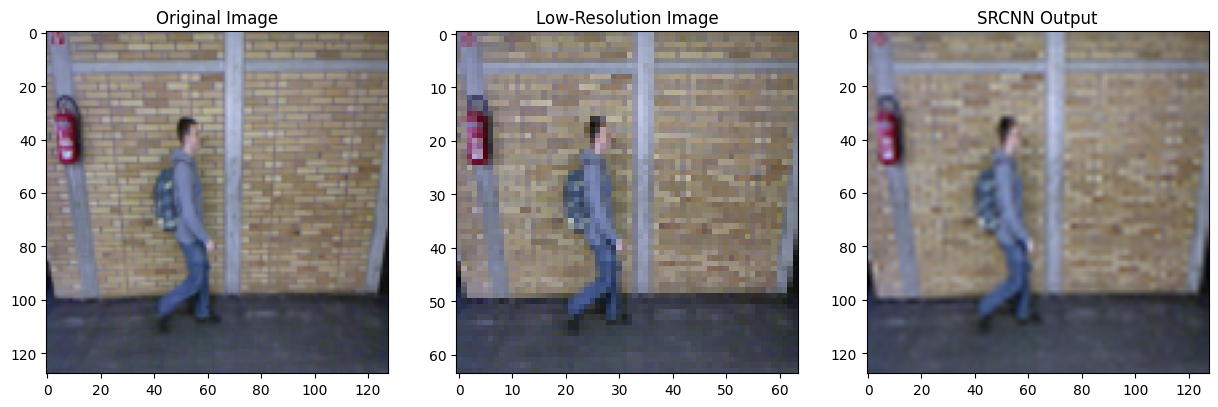

Epoch [81/100], Step [10/59], Loss: 0.0010
Epoch [81/100], Step [20/59], Loss: 0.0010
Epoch [81/100], Step [30/59], Loss: 0.0010
Epoch [81/100], Step [40/59], Loss: 0.0009
Epoch [81/100], Step [50/59], Loss: 0.0010
Validation - Epoch [81/100], SSIM: 0.7925, PSNR: 29.7185, MSE: 0.0010
Epoch [82/100], Step [10/59], Loss: 0.0010
Epoch [82/100], Step [20/59], Loss: 0.0010
Epoch [82/100], Step [30/59], Loss: 0.0010
Epoch [82/100], Step [40/59], Loss: 0.0011
Epoch [82/100], Step [50/59], Loss: 0.0010
Validation - Epoch [82/100], SSIM: 0.7923, PSNR: 29.7071, MSE: 0.0010
Epoch [83/100], Step [10/59], Loss: 0.0010
Epoch [83/100], Step [20/59], Loss: 0.0009
Epoch [83/100], Step [30/59], Loss: 0.0010
Epoch [83/100], Step [40/59], Loss: 0.0010
Epoch [83/100], Step [50/59], Loss: 0.0010
Validation - Epoch [83/100], SSIM: 0.7928, PSNR: 29.7066, MSE: 0.0010
Epoch [84/100], Step [10/59], Loss: 0.0011
Epoch [84/100], Step [20/59], Loss: 0.0010
Epoch [84/100], Step [30/59], Loss: 0.0009
Epoch [84/100], 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.012626857..0.97379476].


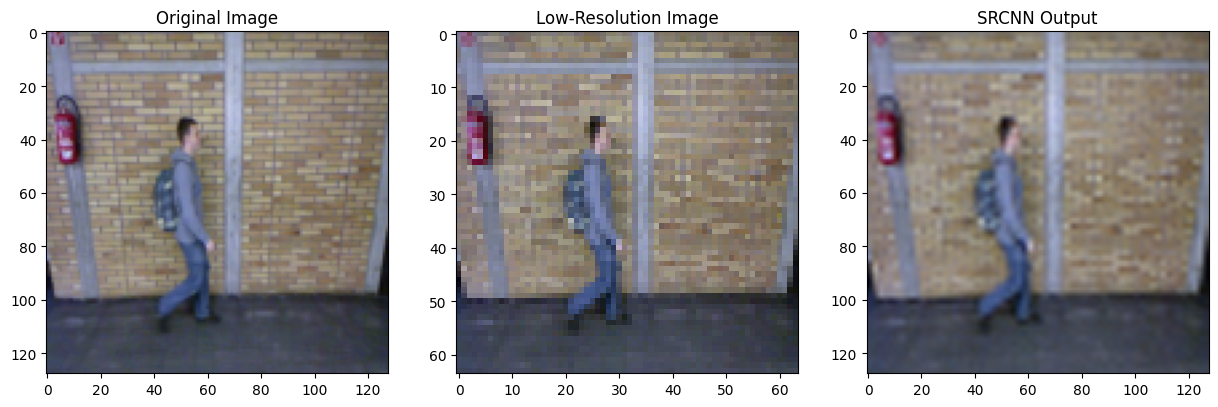

Epoch [91/100], Step [10/59], Loss: 0.0010
Epoch [91/100], Step [20/59], Loss: 0.0011
Epoch [91/100], Step [30/59], Loss: 0.0010
Epoch [91/100], Step [40/59], Loss: 0.0010
Epoch [91/100], Step [50/59], Loss: 0.0009
Validation - Epoch [91/100], SSIM: 0.7941, PSNR: 29.7617, MSE: 0.0009
Epoch [92/100], Step [10/59], Loss: 0.0010
Epoch [92/100], Step [20/59], Loss: 0.0009
Epoch [92/100], Step [30/59], Loss: 0.0010
Epoch [92/100], Step [40/59], Loss: 0.0010
Epoch [92/100], Step [50/59], Loss: 0.0010
Validation - Epoch [92/100], SSIM: 0.7940, PSNR: 29.6427, MSE: 0.0010
Epoch [93/100], Step [10/59], Loss: 0.0010
Epoch [93/100], Step [20/59], Loss: 0.0010
Epoch [93/100], Step [30/59], Loss: 0.0010
Epoch [93/100], Step [40/59], Loss: 0.0010
Epoch [93/100], Step [50/59], Loss: 0.0011
Validation - Epoch [93/100], SSIM: 0.7941, PSNR: 29.3255, MSE: 0.0010
Epoch [94/100], Step [10/59], Loss: 0.0010
Epoch [94/100], Step [20/59], Loss: 0.0011
Epoch [94/100], Step [30/59], Loss: 0.0009
Epoch [94/100], 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.010450048..0.9720332].


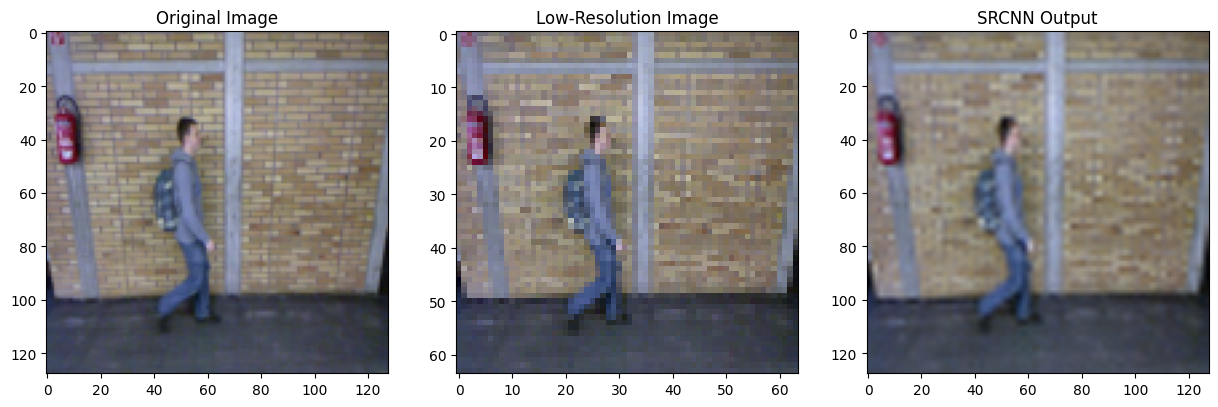

In [ ]:
num_epochs = 100


def visualize_progress(model, dataloader):
    model.eval()
    with torch.no_grad():  # No gradients: During evaluation or inference, we don't need to update the model, so calculating gradients is unnecessary and takes extra memory and computation.
        for i, data in enumerate(dataloader):
            inputs = data.to(device)
            inputs_low_res = F.interpolate(inputs, scale_factor=0.5, mode='bicubic', align_corners=False)
            outputs = model(inputs_low_res)
            outputs_upsampled = F.interpolate(outputs, size=inputs.shape[2:], mode='bicubic', align_corners=False) # inputs (batch_size, channels, height, width) make the size of the target image as the input

            # Display the input, low-res, and output images
            fig, axs = plt.subplots(1, 3, figsize=(15, 5))
            axs[0].imshow(inputs[0].cpu().permute(1, 2, 0))
            axs[0].set_title('Original Image')
            axs[1].imshow(inputs_low_res[0].cpu().permute(1, 2, 0))
            axs[1].set_title('Low-Resolution Image')
            axs[2].imshow(outputs_upsampled[0].cpu().permute(1, 2, 0))
            axs[2].set_title('SRCNN Output')
            plt.show()

            # Only visualize one batch for simplicity
            break

for epoch in range(num_epochs):
    model.train()
    for i, data in enumerate(train_loader):
        inputs = data.to(device)
        inputs_low_res = F.interpolate(inputs, scale_factor=0.5, mode='bicubic', align_corners=False)
        outputs = model(inputs_low_res)
        outputs_upsampled = F.interpolate(outputs, size=inputs.shape[2:], mode='bicubic', align_corners=False)
        loss = criterion(outputs_upsampled, inputs)

        optimizer.zero_grad() # resetting the gradients of all the model's parameters to zero. # Resetting: We need to reset (clear) the gradients to zero before computing the new gradients for the next batch.
        loss.backward() # Calculates the gradients of the loss with respect to the model's parameters # understanding how much each parameter contributed to the error.
        optimizer.step() # Updates the model's parameters using the gradients calculated 

        if (i+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}') # 13 batches of data.
    
    # Validation
    model.eval()
    ssim_total, psnr_total, mse_total = 0, 0, 0
    with torch.no_grad():
        for data in val_loader:
            inputs = data.to(device)
            inputs_low_res = F.interpolate(inputs, scale_factor=0.5, mode='bicubic', align_corners=False)
            outputs = model(inputs_low_res)
            outputs_upsampled = F.interpolate(outputs, size=inputs.shape[2:], mode='bicubic', align_corners=False)
            ssim_val, psnr_val, mse_val = calculate_metrics(outputs_upsampled, inputs)
            ssim_total += ssim_val
            psnr_total += psnr_val
            mse_total += mse_val

    print(f'Validation - Epoch [{epoch+1}/{num_epochs}], SSIM: {ssim_total/len(val_loader):.4f}, PSNR: {psnr_total/len(val_loader):.4f}, MSE: {mse_total/len(val_loader):.4f}')
    
    # Visualize progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        visualize_progress(model, test_loader)


In [ ]:
# Save the model's state dictionary
torch.save(model.state_dict(), "srcnn_model.pth")
print("Model saved successfully.")

Model saved successfully.


## Utilizing the model

In [6]:
def visualize_one_random_image(model, dataloader):
    model.eval()
    with torch.no_grad():
        data_iter = iter(dataloader)
        data = next(data_iter)
        inputs = data.to(device)
        inputs_low_res = F.interpolate(inputs, scale_factor=0.5, mode='bicubic', align_corners=False)
        outputs = model(inputs_low_res)
        outputs_upsampled = F.interpolate(outputs, size=inputs.shape[2:], mode='bicubic', align_corners=False)

        # Calculate metrics
        ssim_val, psnr_val, mse_val = calculate_metrics(outputs_upsampled, inputs)

        # Display the input, low-res, and output images
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        axs[0].imshow(inputs[0].cpu().permute(1, 2, 0))
        axs[0].set_title('Original Image')
        axs[1].imshow(inputs_low_res[0].cpu().permute(1, 2, 0))
        axs[1].set_title('Low-Resolution Image')
        axs[2].imshow(outputs_upsampled[0].cpu().permute(1, 2, 0))
        axs[2].set_title(f'SRCNN Output\nPSNR: {psnr_val:.2f}, SSIM: {ssim_val:.4f}, MSE: {mse_val:.6f}')
        plt.show()

visualize_one_random_image(model, DataLoader(test_dataset, batch_size=1, shuffle=True))


NameError: name 'test_dataset' is not defined

In [16]:

def calculate_metrics(original, enhanced):
    original_np = (original.cpu().numpy().transpose(1, 2, 0) * 255).clip(0, 255).astype('uint8')
    enhanced_np = (enhanced.cpu().numpy().transpose(1, 2, 0) * 255).clip(0, 255).astype('uint8')
    psnr_value = psnr(original_np, enhanced_np, data_range=255)
    ssim_value = ssim(original_np, enhanced_np, data_range=255, channel_axis=2)
    return psnr_value, ssim_value

def auto_tone_image(pil_img):
    """Apply Auto Tone by stretching each channel to full 0-255 range"""
    img = np.array(pil_img)
    result = np.zeros_like(img)

    for c in range(3):
        channel = img[:, :, c]
        min_val, max_val = channel.min(), channel.max()
        if max_val > min_val:
            stretched = (channel - min_val) * (255.0 / (max_val - min_val))
            result[:, :, c] = np.clip(stretched, 0, 255)
        else:
            result[:, :, c] = channel

    return Image.fromarray(result.astype(np.uint8))

def sharpen_pil_image(pil_img, intensity=0.5):
    """Sharpen a PIL image with adjustable intensity (0–1)"""
    img_cv = np.array(pil_img)
    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)

    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

    sharpened = cv2.filter2D(img_cv, -1, kernel)
    blended = cv2.addWeighted(img_cv, 1 - intensity, sharpened, intensity, 0)
    blended_rgb = cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)

    return Image.fromarray(blended_rgb)

def process_and_evaluate(image_path, model, transform, device, sharpen_intensity=0.5):
    image = Image.open(image_path).convert('RGB')
    
    # Apply auto tone first
    image = auto_tone_image(image)

    # Then sharpen the image
    image = sharpen_pil_image(image, intensity=sharpen_intensity)

    # Transform and prepare for model
    input_tensor = transform(image).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        output = model(input_tensor)
        output_upsampled = F.interpolate(output, size=input_tensor.shape[2:], mode='bicubic', align_corners=False)

    psnr_val, ssim_val = calculate_metrics(input_tensor[0], output_upsampled[0])
    return input_tensor, output_upsampled, psnr_val, ssim_val

def visualize_results(input_tensor,  output_upsampled, psnr_val, ssim_val):
    orig_img = input_tensor[0].cpu().permute(1, 2, 0).numpy()
    output_img = output_upsampled[0].cpu().permute(1, 2, 0).numpy()

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(orig_img)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(output_img)
    axs[1].set_title(f'Super-Resolution Image\nPSNR: {psnr_val:.2f} dB, SSIM: {ssim_val:.4f}')
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()


In [8]:
# Load the model
loaded_model = SRCNN().to(device)
loaded_model.load_state_dict(torch.load("srcnn_model.pth", map_location=device))
loaded_model.eval()

SRCNN(
  (conv1): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
  (conv2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
  (conv3): Conv2d(32, 3, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
)

In [22]:
# Load the low-resolution image
image_path = "0014.jpg"
image = Image.open(image_path).convert('RGB')

# Apply the same transformations as the dataset
input_tensor = transform(image).unsqueeze(0).to(device)

sharpen_intensity = 0.5  # adjust sharpness here (0 to 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.092549324..1.086364].


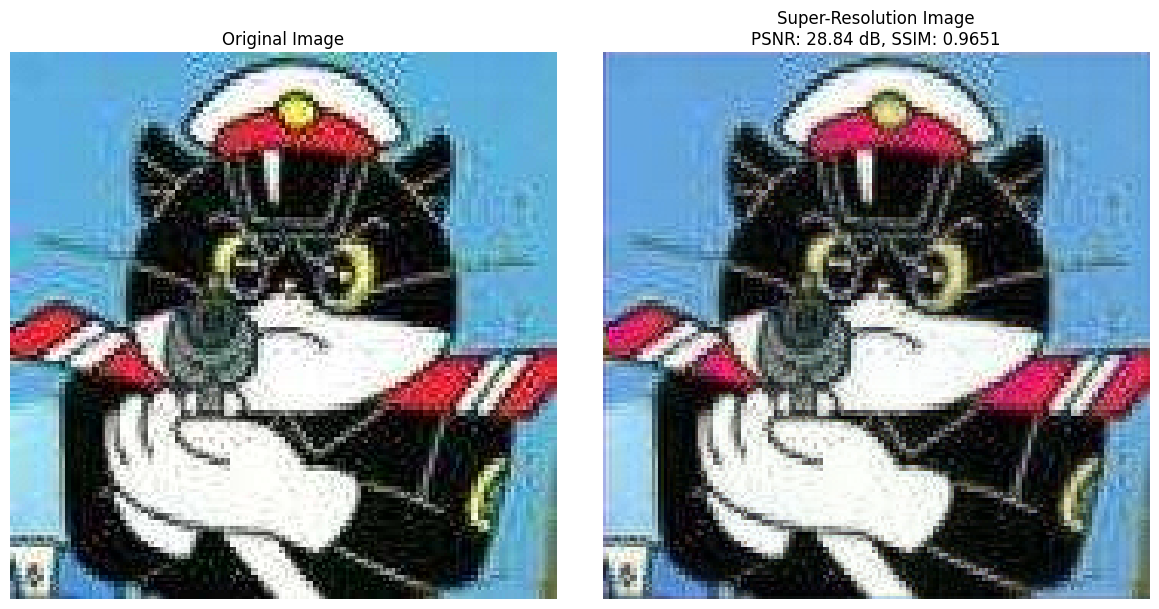


Quality Metrics for 0014.jpg:
PSNR: 28.84 dB
SSIM: 0.9651


In [20]:

input_tensor, output_upsampled, psnr_val, ssim_val = process_and_evaluate(
    image_path, loaded_model, transform, device, sharpen_intensity=sharpen_intensity )

visualize_results(input_tensor, output_upsampled, psnr_val, ssim_val)

print(f"\nQuality Metrics for {image_path}:")
print(f"PSNR: {psnr_val:.2f} dB")
print(f"SSIM: {ssim_val:.4f}")

### Convert video to frames


In [ ]:

# Define the input video path and output folder for frames
video_name = 'video_1'
video_path = 'videos\\' + video_name + '.mp4'
input_frames_folder = 'videos\\' + video_name + '_frames'
os.makedirs(input_frames_folder, exist_ok=True)

video_capture = cv2.VideoCapture(video_path)

# Get the frame rate
frame_rate = video_capture.get(cv2.CAP_PROP_FPS)
video_capture.release()

print(f"The frame rate of the video is {frame_rate} FPS.")

# Open the video file
video_capture = cv2.VideoCapture(video_path)

frame_count = 0
while True:
    ret, frame = video_capture.read()
    if not ret:
        break  # Exit the loop if no more frames are available

    # Save the current frame as an image
    frame_filename = os.path.join(input_frames_folder, f'frame_{frame_count:04d}.png')
    cv2.imwrite(frame_filename, frame)
    frame_count += 1

# Release the video capture object
video_capture.release()

print(f"Extracted {frame_count} frames from {video_path} and saved to {input_frames_folder}")

Extracted 272 frames from videos\video_1.mp4 and saved to videos\video_1_frames


In [23]:
folder_path = input_frames_folder
output_folder = 'videos\\' + video_name + '_SRframes'  # Folder to save results
os.makedirs(output_folder, exist_ok=True)

for image_name in os.listdir(folder_path):
    image_path = os.path.join(folder_path, image_name)
    if not image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        continue  # Skip non-image files

    try:
        input_tensor, output_upsampled, psnr_val, ssim_val = process_and_evaluate(
            image_path, loaded_model, transform, device, sharpen_intensity=sharpen_intensity
        )

        # visualize_results(input_tensor, output_upsampled, psnr_val, ssim_val)

        print(f"\nQuality Metrics for {image_name}:")
        # print(f"PSNR: {psnr_val:.2f} dB")
        # print(f"SSIM: {ssim_val:.4f}")

        # Save the output image
        output_image = output_upsampled[0].cpu().permute(1, 2, 0).numpy()
        output_image = (output_image * 255).clip(0, 255).astype('uint8')
        output_image_pil = Image.fromarray(output_image)
        output_image_pil.save(os.path.join(output_folder, f"enhanced_{image_name}"))

    except Exception as e:
        print(f"Error processing {image_name}: {e}")


Quality Metrics for frame_0000.png:

Quality Metrics for frame_0001.png:

Quality Metrics for frame_0002.png:

Quality Metrics for frame_0003.png:

Quality Metrics for frame_0004.png:

Quality Metrics for frame_0005.png:

Quality Metrics for frame_0006.png:

Quality Metrics for frame_0007.png:

Quality Metrics for frame_0008.png:

Quality Metrics for frame_0009.png:

Quality Metrics for frame_0010.png:

Quality Metrics for frame_0011.png:

Quality Metrics for frame_0012.png:

Quality Metrics for frame_0013.png:

Quality Metrics for frame_0014.png:

Quality Metrics for frame_0015.png:

Quality Metrics for frame_0016.png:

Quality Metrics for frame_0017.png:

Quality Metrics for frame_0018.png:

Quality Metrics for frame_0019.png:

Quality Metrics for frame_0020.png:

Quality Metrics for frame_0021.png:

Quality Metrics for frame_0022.png:

Quality Metrics for frame_0023.png:

Quality Metrics for frame_0024.png:

Quality Metrics for frame_0025.png:

Quality Metrics for frame_0026.png:



In [26]:

# Define the output video path and frame rate
video_output_path = 'videos\\SR_' + video_name + '.avi'

print("Frame Rate: " + frame_rate)
# Get all image file names in the output folder
image_files = [f for f in os.listdir(output_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
image_files.sort()  # Sort the files to maintain the correct order

# Read the first image to get the frame size
first_image_path = os.path.join(output_folder, image_files[0])
first_image = cv2.imread(first_image_path)
height, width, layers = first_image.shape

# Define the video writer
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for AVI format
video_writer = cv2.VideoWriter(video_output_path, fourcc, frame_rate, (width, height))

# Write each image to the video
for image_file in image_files:
    image_path = os.path.join(output_folder, image_file)
    frame = cv2.imread(image_path)
    video_writer.write(frame)

# Release the video writer
video_writer.release()

print(f"Video saved successfully at {video_output_path}")

25.00048943972892
Video saved successfully at videos\SR_video_1.avi


In [28]:
# Define the output video path and frame rate
video_output_path = 'videos\\SR_' + video_name + '.mp4'


# Get all image file names in the output folder
image_files = [f for f in os.listdir(output_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
image_files.sort()  # Sort the files to maintain the correct order

# Read the first image to get the frame size
first_image_path = os.path.join(output_folder, image_files[0])
first_image = cv2.imread(first_image_path)
height, width, layers = first_image.shape

# Define the video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
video_writer = cv2.VideoWriter(video_output_path, fourcc, frame_rate, (width, height))

# Write each image to the video
for image_file in image_files:
    image_path = os.path.join(output_folder, image_file)
    frame = cv2.imread(image_path)
    video_writer.write(frame)

# Release the video writer
video_writer.release()

print(f"Video saved successfully at {video_output_path}")


Video saved successfully at videos\SR_video_1.mp4
